This is about the Bernstein-Vazirani Algorithm

In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [2]:
secretnumber = '101001'

In [3]:
circuit = QuantumCircuit(6+1, 6)

circuit.h([0,1,2,3,4,5])
circuit.x(6)
circuit.h(6)

circuit.barrier()
circuit.cx(5, 6)
circuit.cx(3, 6)
circuit.cx(1, 6)

circuit.barrier()
circuit.h([0,1,2,3,4,5])
circuit.barrier()
circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])

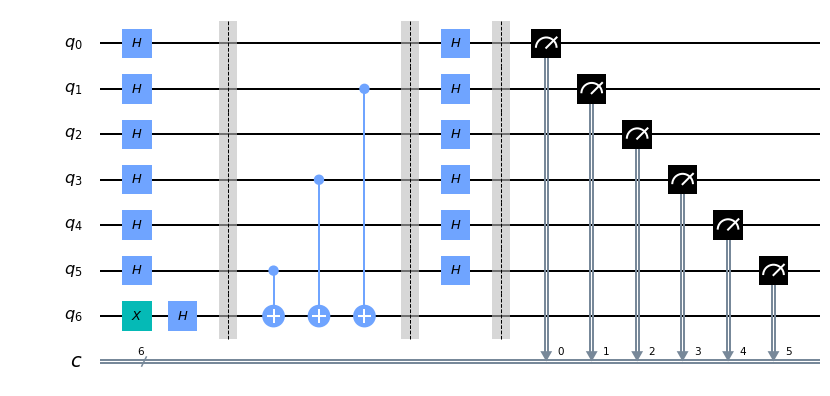

In [4]:
circuit.draw(output='mpl')

In [5]:
simulator= Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots =1).result()
counts = result.get_counts()
print(counts)

{'101010': 1}


Now let's do a more general version, to check for any 'secret number'

In [6]:
secretnumber = '1110101111010'

In [7]:
circuit = QuantumCircuit(len(secretnumber)+1, len(secretnumber))

circuit.h(range(len(secretnumber)))
circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1':
        circuit.cx(ii, len(secretnumber))

circuit.barrier()
circuit.h(range(len(secretnumber)))
circuit.barrier()
circuit.measure(range(len(secretnumber)), range(len(secretnumber)))

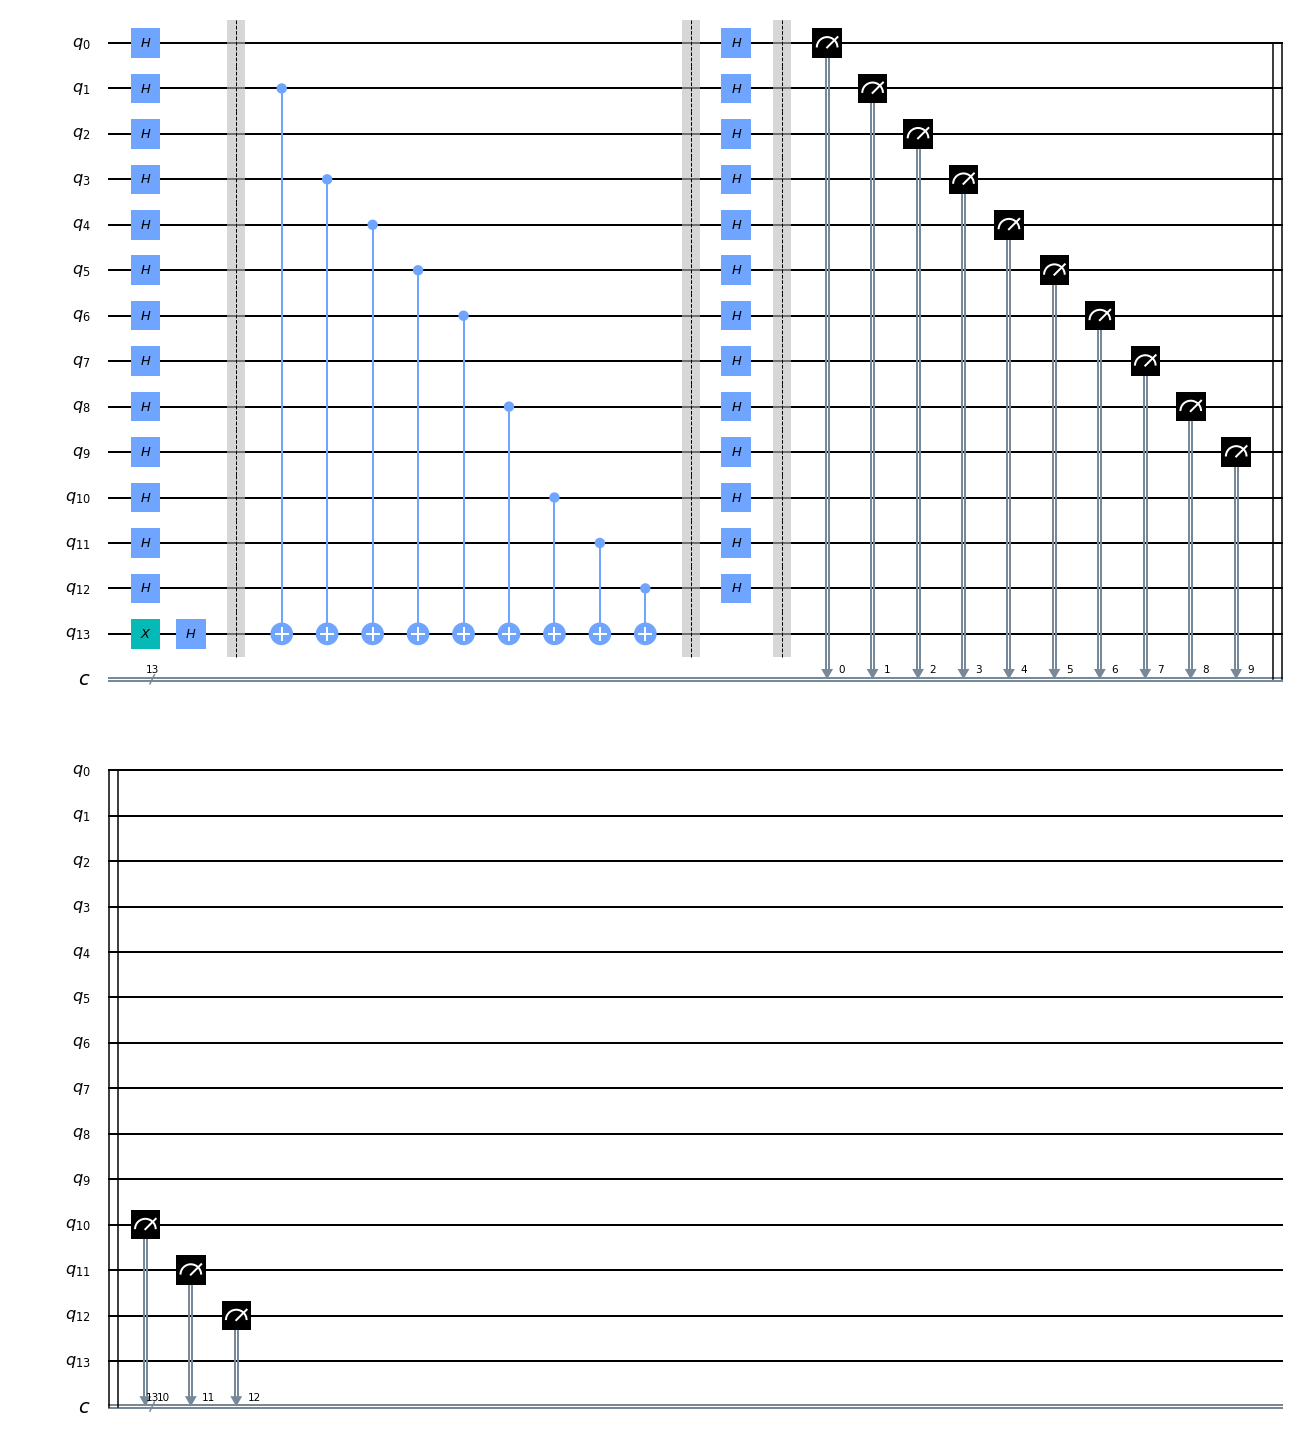

In [8]:
circuit.draw(output='mpl')

In [9]:
simulator= Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots =1).result()
counts = result.get_counts()
print(counts)

{'1110101111010': 1}
